## Print table horizontally

In [20]:
import numpy as np

# Step 1: Store the table layout and column/row definitions in dictionaries

def get_label(labels, key):
    return labels.get(key, key)

def latex_table(stats, config):
    columns = config['columns']
    rows = config['rows']
    tasks = config['tasks']
    
    # Create the table layout
    left_align_columns = "l" * 2
    column_formats = "c" * (len(columns) - 2)
    latex = "\\begin{tabular}{" + left_align_columns + "|" + column_formats + "}\n"
    latex += "\\toprule\n"
    
    # Column labels
    header_row = " & ".join([get_label(config['column_labels'], col) for col in columns])
    latex += header_row + "\\\\\n"
    latex += "\\midrule\n"
    
    # Data
    for task_key in tasks.keys():
        for row_key in rows:
            if row_key in stats:
                if rows.index(row_key) == 0:
                    latex += get_label(config['task_labels'], task_key) + " & "
                else:
                    latex += "{} & "
                latex += get_label(config['row_labels'], row_key) + " & "

                for col_key in columns[2:]:
                    if col_key in stats[row_key][task_key]:
                        val_mean, val_std = stats[row_key][task_key][col_key]
                        latex += "{} $\pm$ {} & ".format(np.round(val_mean * 100, 1), np.round(val_std * 100, 1))
                    else:
                        latex += "N/A & "
                latex = latex[:-2]
                latex += " \\\\\n"
    latex += "\\bottomrule\n"
    latex += "\\end{tabular}"
    return latex

# Usage:

stats = {

    "fwt": {
        "libero-object": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
        "libero-goal": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
        "libero-100": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
    },
    "nbt": {
        "libero-object": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
        "libero-goal": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
        "libero-100": {
            "mtft": [0.95, 0.05],
            "mter": [0.95, 0.05],
            "buds": [0.95, 0.05],
            "ours-ft": [0.95, 0.05],
            "ours": [0.95, 0.05],
        },
    },
   
}

config = {
    "columns": ["Tasks", "Evaluation Setting", "mtft", "mter", "buds", "ours-ft", "ours"],
    "rows": ["fwt", "nbt"],
    "tasks": {
        "libero-object": "LIBERO-Object",
        "libero-goal": "LIBERO-Goal",
        "libero-100": "LIBERO-100",
    },
    "column_labels": {
        "mtft": "\mtft{}",
        "mter": "\mter{}",
        "buds": "\buds",
        "ours-ft": "\ourmethod-ft{}",
        "ours": "\ourmethod{}",
    },
    "task_labels": {
        "libero-object": "LIBERO-Object",
        "libero-goal": "LIBERO-Goal",
        "libero-100": "LIBERO-100",
    },
    "row_labels": {
        "fwt": "FWT",
        "nbt": "NBT",
    }
}

print(latex_transposed_table(stats, config))



\begin{tabular}{ll|ccccc}
\toprule
Tasks & Evaluation Setting & \mtft{} & \mter{} &uds & \ourmethod-ft{} & \ourmethod{}\\
\midrule
LIBERO-Object & FWT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
{} & NBT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
LIBERO-Goal & FWT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
{} & NBT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
LIBERO-100 & FWT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
{} & NBT & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0 & 95.0 $\pm$ 5.0  \\
\bottomrule
\end{tabular}


## Print table vertically

In [ ]:
def latex_transposed_table(stats, config):
    columns = config['columns']
    rows = config['rows']
    tasks = config['tasks']
    
    # Create the table layout
    left_align_columns = "l"
    column_formats = "c" * (len(columns) - 2)
    latex = "\\begin{tabular}{" + left_align_columns + "|" + column_formats + "}\n"
    latex += "\\toprule\n"
    
    # Column labels
    header_row = " & ".join([get_label(config['column_labels'], col) for col in columns])
    latex += header_row + "\\\\\n"
    latex += "\\midrule\n"
    
    # Data
    for task_key in tasks.keys():
        for row_key in rows:
            if row_key in stats:
                if rows.index(row_key) == 0:
                    latex += get_label(config['task_labels'], task_key) + " & "
                else:
                    latex += "{} & "
                latex += get_label(config['row_labels'], row_key) + " & "

                for col_key in columns[2:]:
                    if col_key in stats[row_key][task_key]:
                        val_mean, val_std = stats[row_key][task_key][col_key]
                        latex += "{} $\pm$ {} & ".format(np.round(val_mean * 100, 1), np.round(val_std * 100, 1))
                    else:
                        latex += "N/A & "
                latex = latex[:-2]
                latex += " \\\\\n"
    latex += "\\bottomrule\n"
    latex += "\\end{tabular}"
    return latex


transposed_stats = {
    'libero-object': {
        'fwt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        },
        'nbt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        }
    },
    'libero-goal': {
        'fwt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        },
        'nbt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        }
    },
    'libero-100': {
        'fwt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        },
        'nbt': {
            'mtft': [0.95, 0.05],
            'mter': [0.95, 0.05],
            'buds': [0.95, 0.05],
            'ours-ft': [0.95, 0.05],
            'ours': [0.95, 0.05]
        }
    }
}
    

config = {
    "columns": ["Methods", "", "libero-object", "libero-goal", "libero-100"],
    "tasks": {
        "libero-object": "LIBERO-Object",
        "libero-goal": "LIBERO-Goal",
        "libero-100": "LIBERO-100",
    },
    "methods": {
        "mtft": "\mtft{}",
        "mter": "\mter{}",
        "buds": "\buds",
        "ours-ft": "\ourmethod-ft{}",
        "ours": "\ourmethod{}",
    },
    "task_labels": {
        "libero-object": "LIBERO-Object",
        "libero-goal": "LIBERO-Goal",
        "libero-100": "LIBERO-100",
    },
    # "row_labels": {
    #     "fwt": "FWT",
    #     "nbt": "NBT",
    # }
}

## Main Result Table

Rows: Task suites

Columns: Evaluation metrics
- Metrics: NBT, FWT

Value formats: {metric:0.1f} \pm {metric std: 0.1f}

## Figure Colors

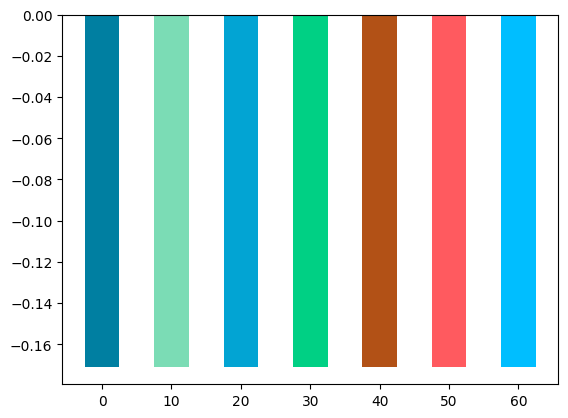

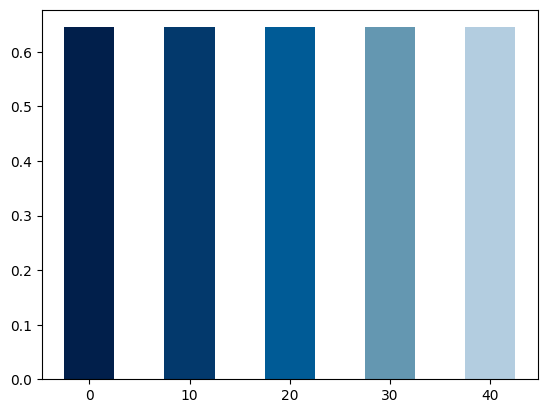

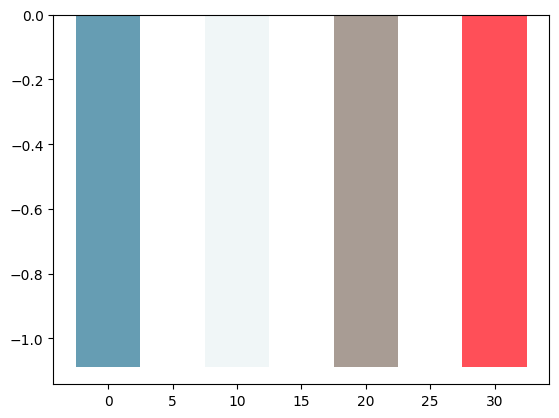

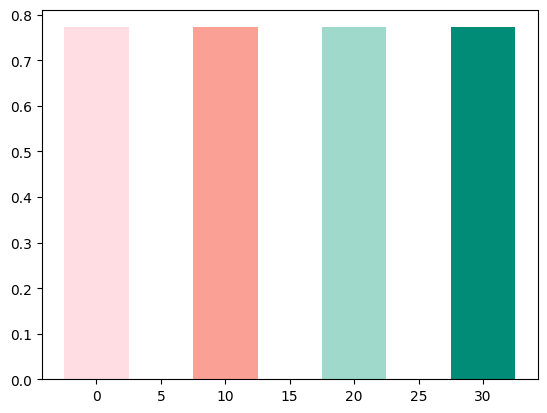

In [30]:
import numpy as np
import matplotlib.pyplot as plt

def plot_bar_chart(color_codes):
    x = np.arange(len(color_codes)) * 10

    plt.bar(x, np.random.randn() * np.ones(len(color_codes)), color=color_codes, width=5, label='RNN')
    plt.show()
simple_color_codes = ['#007FA1', 
               '#7BDCB5', 
               '#02A4D3',
               '#00D084', 
            
              '#B25116', 
              '#FF5A5F',
               '#00BEFF',
              ]

plot_bar_chart(simple_color_codes)

blue_colors = ["#011f4b", "#03396c", "#005b96", "#6497b1", "#b3cde0"]
plot_bar_chart(blue_colors)

coral_colors = ["#669DB3FF", "#F0F6F7FF", "#A89C94FF", "#FF4F58FF"]
plot_bar_chart(coral_colors)

colors = ["#FFDDE2FF", "#FAA094FF", "#9ED9CCFF", "#008C76FF"]
plot_bar_chart(colors)


## Ablation Table